## Space Optimization of a Truck

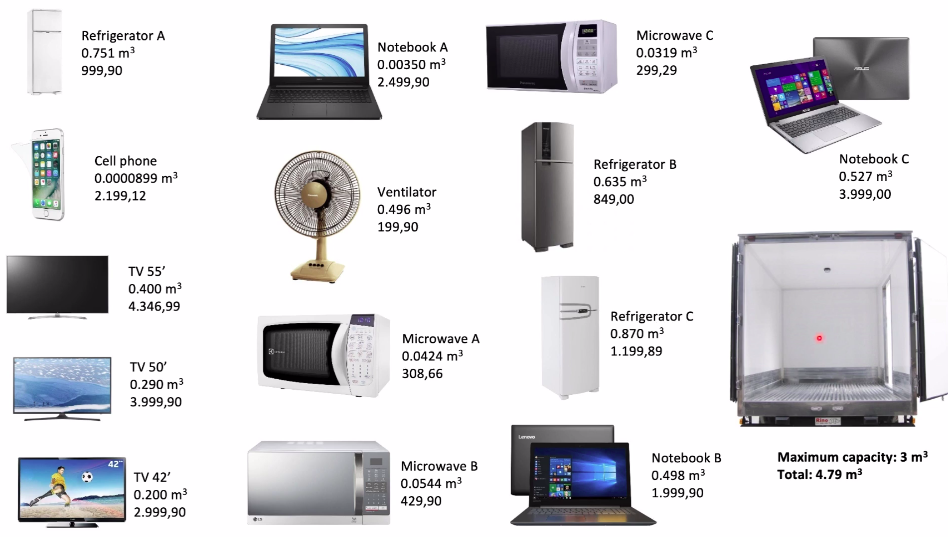


# Product Class

In [1]:
class Product():
  def __init__(self, name, space, price):
    self.name = name
    self.space = space
    self.price = price 

In [2]:
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50", 0.290, 3999.90))
products_list.append(Product("TV 42", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00)) 

space_limit = 3
limit = 3
population_size = 20
mutation_probability = 0.01
number_of_generations = 100

In [3]:
from random import random

In [38]:
class Individual():
  def __init__(self, spaces, prices, space_limit, generation=0):
    self.spaces = spaces
    self.prices = prices
    self.space_limit = space_limit
    self.score_evaluation = 0
    self.used_space = 0
    self.generation = generation
    self.chromosome = []

    for i in range(len(spaces)):
      if random() < 0.5:
        self.chromosome.append('0')
      else:
        self.chromosome.append('1')

  def fitness(self):
    score = 0
    sum_spaces = 0
    for i in range(len(self.chromosome)):
      if self.chromosome[i] == '1':
        score += self.prices[i]
        sum_spaces += self.spaces[i]
    # print(sum_spaces, self.space_limit)
    if sum_spaces > self.space_limit:
      score = 1
    
    self.score_evaluation = score
    self.used_space = sum_spaces

  def crossover(self, other_individual):
    cutoff = round(random() * len(self.chromosome))
    #print(cutoff)

    child1 = other_individual.chromosome[0:cutoff] + self.chromosome[cutoff::]
    child2 = self.chromosome[0:cutoff] + other_individual.chromosome[cutoff::]
    #print(child1)
    #print(child2)
    children = [Individual(self.spaces, self.prices, self.space_limit, self.generation + 1),
                Individual(self.spaces, self.prices, self.space_limit, self.generation + 1)]
    children[0].chromosome = child1
    children[1].chromosome = child2
    return children

  def mutation(self, rate):
    #print('Before:', self.chromosome)
    for i in range(len(self.chromosome)):
      if random() < rate:
        if self.chromosome[i] == '1':
          self.chromosome[i] = '0'
        else:
          self.chromosome[i] = '1'
    #print('After: ', self.chromosome)
    return self

In [39]:
spaces = []
prices = []
names = []

for product in products_list:
  spaces.append(product.space)
  prices.append(product.price)
  names.append(product.name)

In [40]:
individual1 = Individual(spaces, prices, space_limit)
print('Spaces: ', individual1.spaces)
print('Prices: ', individual1.prices)
print('Chromosomes: ',individual1.chromosome)

for j in range(len(spaces)):
  if individual1.chromosome[j] == '1':
    print('Name: ', products_list[j].name)

individual1.fitness()
print('Score: ', individual1.score_evaluation)
print('Used Space: ',individual1.used_space)


Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
Chromosomes:  ['0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0']
Name:  Cell phone
Name:  TV 55
Name:  TV 42
Name:  Notebook A
Name:  Ventilator
Name:  Microwave A
Name:  Microwave C
Name:  Refrigerator C
Name:  Notebook B
Score:  16052.65
Used Space:  2.54180899


In [41]:
individual2 = Individual(spaces, prices, space_limit)

print('Chromosomes: ',individual2.chromosome)

for j in range(len(spaces)):
  if individual2.chromosome[j] == '1':
    print('Name: ', products_list[j].name)

individual2.fitness()
print('Score: ', individual2.score_evaluation)
print('Used Space: ',individual2.used_space)

Chromosomes:  ['1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0']
Name:  Refrigerator A
Name:  TV 55
Name:  TV 50
Name:  TV 42
Name:  Notebook A
Name:  Microwave A
Name:  Microwave B
Name:  Microwave C
Name:  Refrigerator B
Name:  Refrigerator C
Score:  1
Used Space:  3.2782


In [42]:
individual1.crossover(individual2)

In [43]:
children = individual1.crossover(individual2)



In [44]:
children[0].fitness()
print(children[0].score_evaluation)
print(children[0].chromosome)

1
['1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0']


In [45]:
children[1].fitness()
print(children[1].score_evaluation)
print(children[1].chromosome)

14052.75
['0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0']


In [46]:
individual1.mutation(0.05)

Genetic Algorithm

In [47]:
class GeneticAlgorithm():
  def __init__(self, population_size):
    self.population_size = population_size
    self.population = []
    self.generation = 0
    self.best_solution = None
    self.list_of_solutions = []

  def initialize_population(self, spaces, prices, space_limit):
    for i in range(self.population_size):
      self.population.append(Individual(spaces, prices, space_limit))
    self.best_solution = self.population[0]

  def order_population(self):
    self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

  def best_individual(self, individual):
    if individual.score_evaluation > self.best_solution.score_evaluation:
      self.best_solution = individual

  def sum_evaluations(self):
    sum = 0
    for individual in self.population:
      sum += individual.score_evaluation
    return sum

  def select_parent(self, sum_evaluation):
    parent = -1
    random_value = random() * sum_evaluation
    sum = 0
    i = 0
    #print('*** random value:', random_value)
    while i < len(self.population) and sum < random_value:
      #print('i:', i, ' - sum: ', sum)
      sum += self.population[i].score_evaluation
      parent += 1
      i += 1
    return parent

  def visualize_generation(self):
    best = self.population[0]
    print('Generation: ', self.population[0].generation,
          'Total price: ', best.score_evaluation, 'Space: ', best.used_space,
          'Chromosome: ', best.chromosome)
    
  def solve(self, mutation_probability, number_of_generations, spaces, prices, limit):
    self.initialize_population(spaces, prices, limit)
    
    for individual in self.population:
      individual.fitness()
    self.order_population()
    self.best_solution = self.population[0]
    self.list_of_solutions.append(self.best_solution.score_evaluation)

    self.visualize_generation()
    
    for generation in range(number_of_generations):
      sum = self.sum_evaluations()
      new_population = []
      for new_individuals in range(0, self.population_size, 2):
        parent1 = self.select_parent(sum)
        parent2 = self.select_parent(sum)
        children = self.population[parent1].crossover(self.population[parent2])
        new_population.append(children[0].mutation(mutation_probability))
        new_population.append(children[1].mutation(mutation_probability))
      
      self.population = list(new_population)

      for individual in self.population:
        individual.fitness()
      self.visualize_generation()
      best = self.population[0]
      self.list_of_solutions.append(best.score_evaluation)
      self.best_individual(best)

    print('**** Best solution - Generation: ', self.best_solution.generation,
          'Total price: ', self.best_solution.score_evaluation, 'Space: ', self.best_solution.used_space,
          'Chromosome: ', self.best_solution.chromosome)
    
    return self.best_solution.chromosome

TESTS

In [48]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, 3)

In [49]:
ga.population[0].chromosome

['1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0']

In [50]:
ga.population[1].chromosome

['1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1']

In [51]:
for individual in ga.population:
  individual.fitness()

ga.order_population()

for i in range(4):
  print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPrices: ', ga.population[i].prices,
        '\nChromosome: ', ga.population[i].chromosome, '\nScore: ', ga.population[i].score_evaluation, '\n')

Individual:  0 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chromosome:  ['1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0'] 
Score:  16626.8 

Individual:  1 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chromosome:  ['1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1'] 
Score:  15583.529999999999 

Individual:  2 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chromosome:  ['0', '1', '1', '1', '0', 

In [52]:
ga.best_solution.score_evaluation

8654.64

In [53]:
ga.population[0].score_evaluation

16626.8

In [54]:
ga.best_individual(ga.population[0])

In [55]:
ga.best_solution.score_evaluation

16626.8

In [56]:
ga.best_solution.chromosome

['1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0']

In [57]:
sum = ga.sum_evaluations()
print('Sum of Evaluations: ', sum)

Sum of Evaluations:  177912.61000000002


In [58]:
random()*sum

5760.8118805419945

In [59]:
parent1 = ga.select_parent(sum)
parent1

9

In [60]:
parent2 = ga.select_parent(sum)
parent2

11

In [61]:
new_population = []
mutation_probability = 0.01

for new_individuals in range(0, ga.population_size, 2):
  parent1 = ga.select_parent(sum)
  parent2 = ga.select_parent(sum) 
  print(parent1, '<=>', parent2)
  children = ga.population[parent1].crossover(ga.population[parent2])
  print('SELECTED BEST PARENT HERE ',parent1, '&', parent2)
  print('Parent1',ga.population[parent1].chromosome)
  print('Parent2',ga.population[parent2].chromosome)
  print('\n')
  print('CROSSOVER HERE')
  print('Child1',children[0].chromosome)
  print('Child2',children[1].chromosome)
  print('\n')
  print('MUTATION HERE')
  print('Child1')
  new_population.append(children[0].mutation(mutation_probability))
  print('\n')
  print('Child2')
  new_population.append(children[1].mutation(mutation_probability))
  print('==================================================================================')

12 <=> 7
SELECTED BEST PARENT HERE  12 & 7
Parent1 ['1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0']
Parent2 ['1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0']


CROSSOVER HERE
Child1 ['1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0']
Child2 ['1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0']


MUTATION HERE
Child1


Child2
3 <=> 14
SELECTED BEST PARENT HERE  3 & 14
Parent1 ['1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0']
Parent2 ['1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0']


CROSSOVER HERE
Child1 ['1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0']
Child2 ['1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0']


MUTATION HERE
Child1


Child2
4 <=> 11
SELECTED BEST PARENT HERE  4 & 11
Parent1 ['1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1']
Parent2 ['0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0

## **Putting it All Together**

In [64]:
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50", 0.290, 3999.90))
products_list.append(Product("TV 42", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00)) 

spaces = []
prices = []
names = []

for product in products_list:
  spaces.append(product.space)
  prices.append(product.price)
  names.append(product.name)

space_limit = 3
limit = 3
population_size = 50
mutation_probability = 0.01
number_of_generations = 100
ga = GeneticAlgorithm(population_size)
result = ga.solve(mutation_probability, number_of_generations, spaces, prices, limit)
print(result)

print('\n')

print('Final products to be loaded:------')
for i in range(len(products_list)):
  if result[i] == '1':
    print('Name: ', products_list[i].name, ' - Price: ', products_list[i].price)

Generation:  0 Total price:  19552.46 Space:  2.54090899 Chromosome:  ['0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1']
Generation:  1 Total price:  1 Space:  3.19990899 Chromosome:  ['1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1']
Generation:  2 Total price:  10998.11 Space:  0.8234089899999999 Chromosome:  ['0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0']
Generation:  3 Total price:  13202.67 Space:  1.28090899 Chromosome:  ['0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0']
Generation:  4 Total price:  1 Space:  3.46590899 Chromosome:  ['0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1']
Generation:  5 Total price:  23201.47 Space:  2.59590899 Chromosome:  ['0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1']
Generation:  6 Total price:  13546.92 Space:  1.45550899 Chromosome:  ['0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1']
Generation:  7 Tota

In [65]:
import plotly.express as px
figure = px.line(x = range(0,101), y = ga.list_of_solutions, title = 'Genetic algorithm results')
figure.show()